1. Manipular dados com as bibliotecas

*   Pandas
*   Numpy


2. Como importar os dados provenientes de sensores do Arduino a partir de arquivos .CSV

3. Introdução à Análise Exploratória dos Dados

4. Construindo meu primeiro Modelo a partir de dados capturados

## 1. Bibliotecas para data science

### Numpy

Vamos observar na prática o quanto o Numpy torna mais eficiente alguns cálculos matemáticos....

In [ ]:
import time

start_time = time.time()
a = range(105000)
b = range(105000)
c = []

for i in range(len(a)):
  c.append(a[i] + b[i])
elapsed_time = time.time() - start_time
print(elapsed_time)

0.10993695259094238


In [ ]:
import numpy as np

start_time = time.time()
a = np.arange(105000)
b = np.arange(105000)
c = []

c = a + b

elapsed_time = time.time() - start_time
# Mostrar o resultado
print(elapsed_time)

0.006888866424560547


### Pandas

In [ ]:
import pandas as pd

**Série**

In [ ]:
t_ts = pd.Series([23.3, 24.1, 32.1, 25.0, 31.2])

In [ ]:
t_ts

0    23.3
1    24.1
2    32.1
3    25.0
4    31.2
dtype: float64

In [ ]:
t_ts.values

array([23.3, 24.1, 32.1, 25. , 31.2])

In [ ]:
t_ts.index

RangeIndex(start=0, stop=5, step=1)

In [ ]:
t_ts = pd.Series([23.3, 24.1, 32.1, 25.0, 31.2], index=['Seg', 'Ter', 'Qua', 'Qui', 'Sex'])

In [ ]:
t_ts

Seg    23.3
Ter    24.1
Qua    32.1
Qui    25.0
Sex    31.2
dtype: float64

In [ ]:
print(f"Imprime a média da série: {t_ts.mean()}")


Imprime a média da série: 27.139999999999997


**DataFrame**

In [ ]:
t_df = pd.DataFrame({'Temp': [23.3, 24.1, 32.1, 25.0, 31.2],
                     'Dia': ['Seg', 'Ter', 'Qua', 'Qui', 'Sex'],
                     'Agua': [1, 1, 0, 1, 0]
                     })

In [ ]:
t_df

,Temp,Dia,Agua
0,23.3,Seg,1
1,24.1,Ter,1
2,32.1,Qua,0
3,25.0,Qui,1
4,31.2,Sex,0


In [ ]:
t_df.dtypes

Temp    float64
Dia      object
Agua      int64
dtype: object

In [ ]:
t_df.columns

Index(['Temp', 'Dia', 'Agua'], dtype='object')

In [ ]:
t_df['Temp']

0    23.3
1    24.1
2    32.1
3    25.0
4    31.2
Name: Temp, dtype: float64

In [ ]:
t_df.describe()

,Temp,Agua
count,5.000000,5.000000
mean,27.140000,0.600000
std,4.172889,0.547723
min,23.300000,0.000000
25%,24.100000,0.000000
50%,25.000000,1.000000
75%,31.200000,1.000000
max,32.100000,1.000000


### Matplotlib e Seaborn

Para que é utilizada a visualização de dados?

- Identificação de relações e padrões

- Identificar últimas tendências

- Contar uma _história_

In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [11]:
import pandas as pd

In [48]:
import re

## 2. Importando dados de arquivos csv

A lib pandas nos oferece uma série de métodos para leitura de dados!

Alguns dos mais importantes são:

- **read_csv**: para ler arquivos .csv
- **read_xlsx**: para ler arquivos Excel .xlsx

In [59]:
data = pd.read_csv('log_temp.csv')

In [60]:
data.head(5)

,DATE,TIME,TEMP,HUM
0,3/14/19,19:38:10,T=22.0,H=20.0
1,3/14/19,19:43:11,T=22.0,H=26.0
2,3/14/19,19:48:14,T=22.0,H=26.0
3,3/14/19,19:53:15,T=22.0,H=20.0
4,3/14/19,19:58:15,T=22.0,H=23.0


In [61]:
data = data.drop_duplicates()

In [62]:
def extract_float(value):
    if isinstance(value, str):
        match = re.search(r'\d+\.\d+', value)
        return float(match.group()) if match else None
    return None

def is_time_format(value):
    if isinstance(value, str):
        return re.match(r'^\d{2}:\d{2}:\d{2}$', value) is not None
    return False



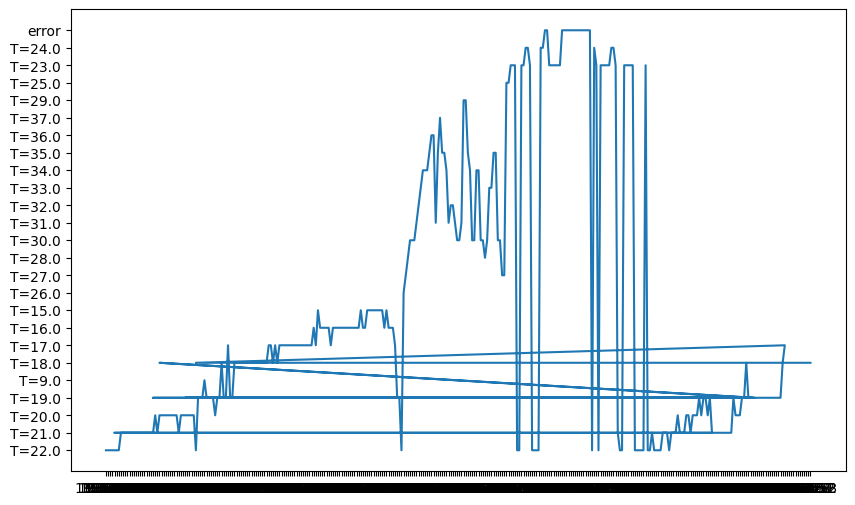

In [63]:
fig = plt.figure(figsize=(10,6))
plt.plot(data['TIME'], data['TEMP'])

In [16]:
data.dtypes

DATE    object
TIME    object
TEMP    object
HUM     object
dtype: object

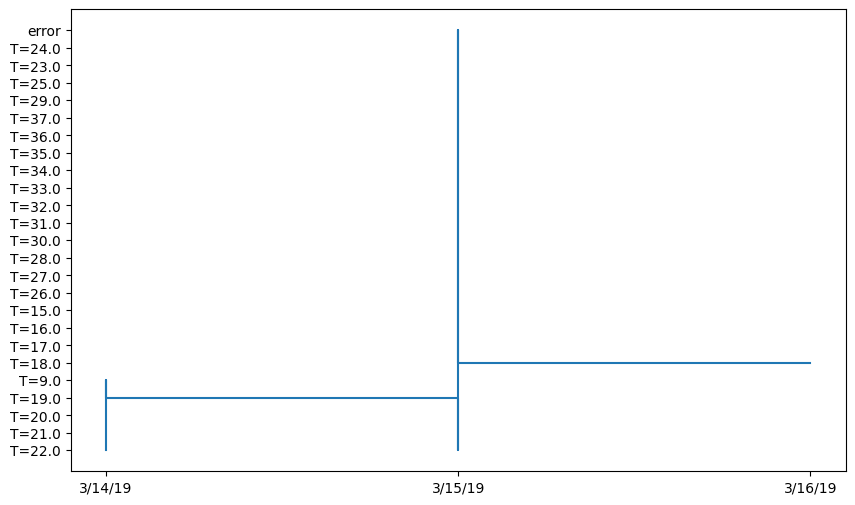

In [23]:
fig = plt.figure(figsize=(10,6))
plt.plot(data['DATE'], data['TEMP'])

In [36]:
data['TEMP'] = data['TEMP'].astype(str)
data['HUM'] = data['HUM'].astype(str)

# Remove the 'T=' and 'H=' parts from the strings
data['TEMP'] = data['TEMP'].str.replace('T=', '')
data['HUM'] = data['HUM'].str.replace('H=', '')

# Convert the cleaned strings to floats
data['TEMP'] = data['TEMP'].astype(float)
data['HUM'] = data['HUM'].astype(float)

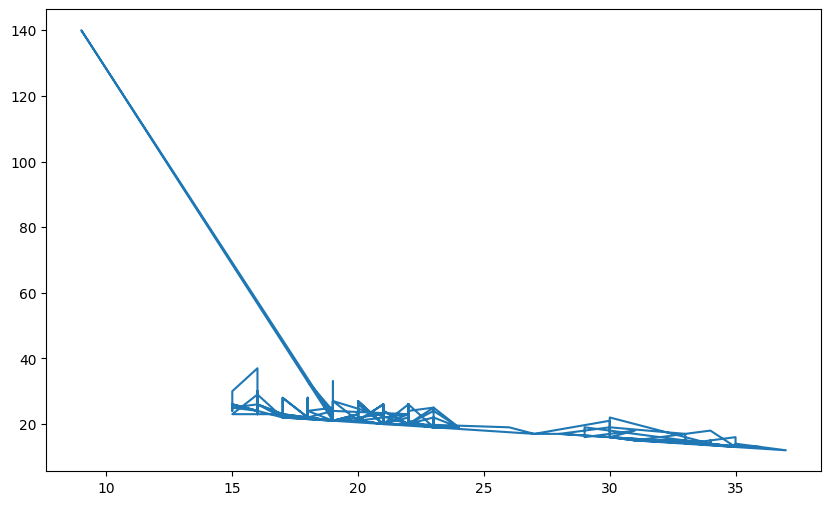

In [37]:
fig = plt.figure(figsize=(10,6))
plt.plot(data['TEMP'], data['HUM'])

## 3. Introdução à Análise Exploratória dos Dados

*Será que a velocidade de condução do veículo é uma distribuição normal?*

<Axes: xlabel='TEMP', ylabel='Count'>

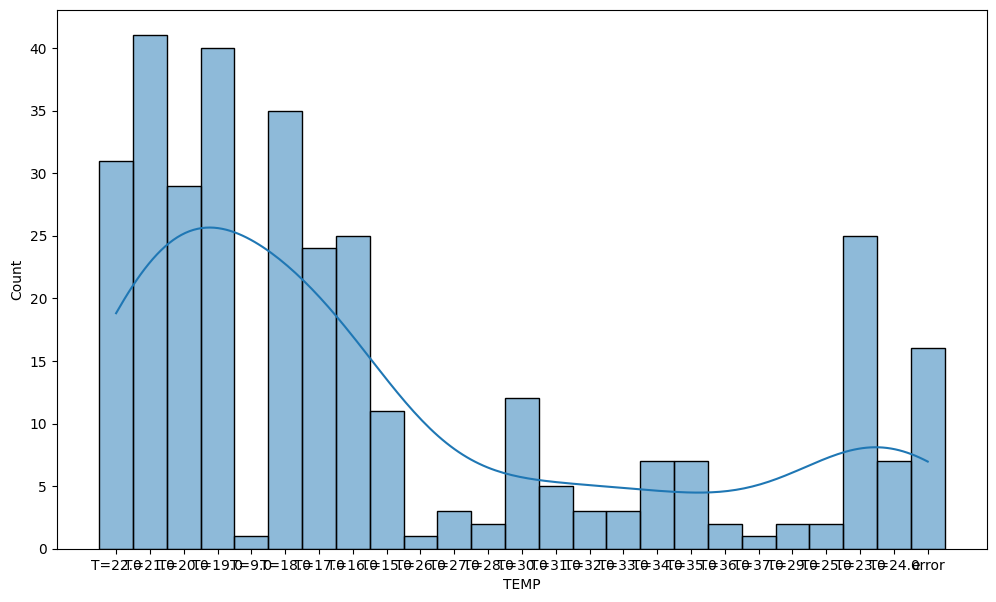

In [26]:
plt.figure(figsize=(12, 7))
sns.histplot(data=data, x="TEMP", kde=True)

<ipython-input-28-661ea9f5c518>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='TIME',data=data, palette='winter')


<Axes: ylabel='TIME'>

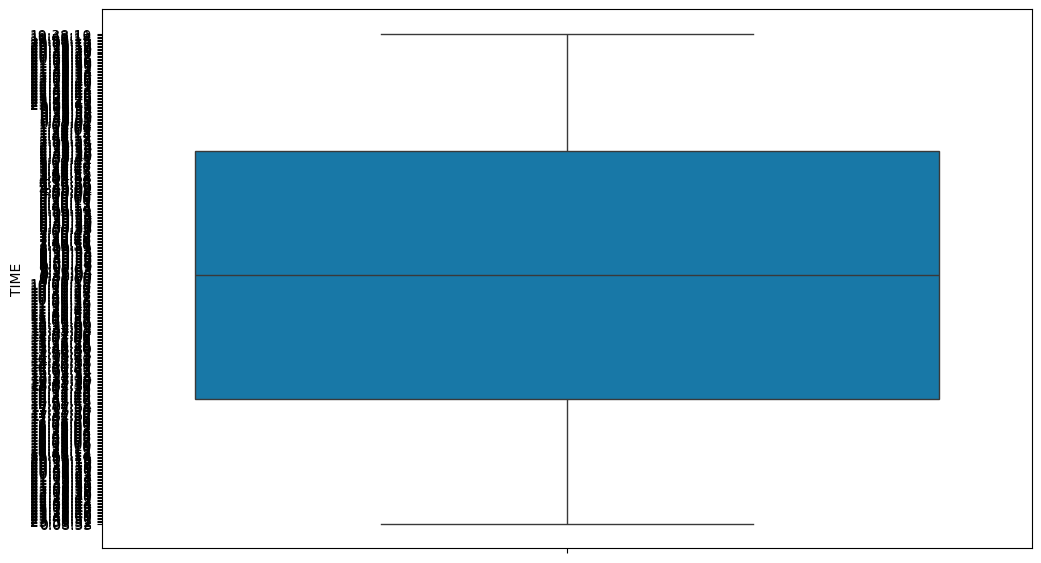

In [28]:
plt.figure(figsize=(12, 7))
sns.boxplot(y='TIME',data=data, palette='winter')

## 4. Construindo Modelos a partir dos dados

A inteligência artifical é o campo da ciência da computação que provê inteligência humana similar à humana para sistemas baseados em _software_.

**4.1 Machine Learning**

Fornece às máquinas técnicas para aprender a partir dos dados.

**4.2 Deep Learning**

Uso de redes neurais para a solução de problemas complexos utilizando grande base de dados.


**Regressão Linear**

![img](https://lh4.ggpht.com/_Qmjqb2Gk9no/TDPGMiFaFcI/AAAAAAAAI-A/nHbiCL9VqbI/image_thumb%5B9%5D.png?imgmax=800)

In [42]:
y = data['TEMP']

In [43]:
X = data.filter(['TIME','HUM'], axis = 1)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [45]:
from sklearn import tree

model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ValueError: could not convert string to float: '21:08:23'

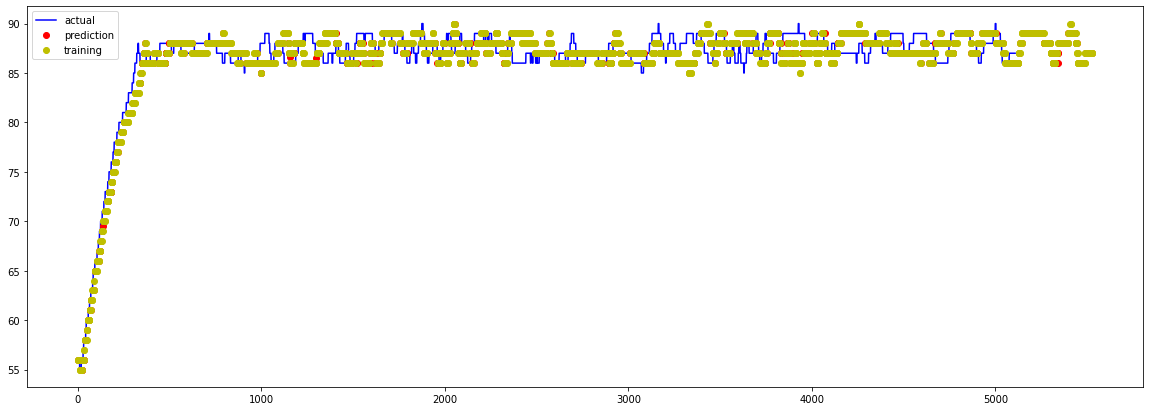

In [ ]:
import matplotlib.pyplot as plt
import datetime

plt.figure(figsize=(20, 7))
plt.plot(range(len(y)), y, 'b-', label = 'actual')
plt.plot(y_test.index, y_pred, 'ro', label = 'prediction')
plt.plot(y_train.index, y_train, 'yo', label = 'training')
plt.legend()

![img2](https://www.researchgate.net/profile/Brian-Mwandau/publication/325870973/figure/fig6/AS:639531594285060@1529487622235/Train-Test-Data-Split.png)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=False)

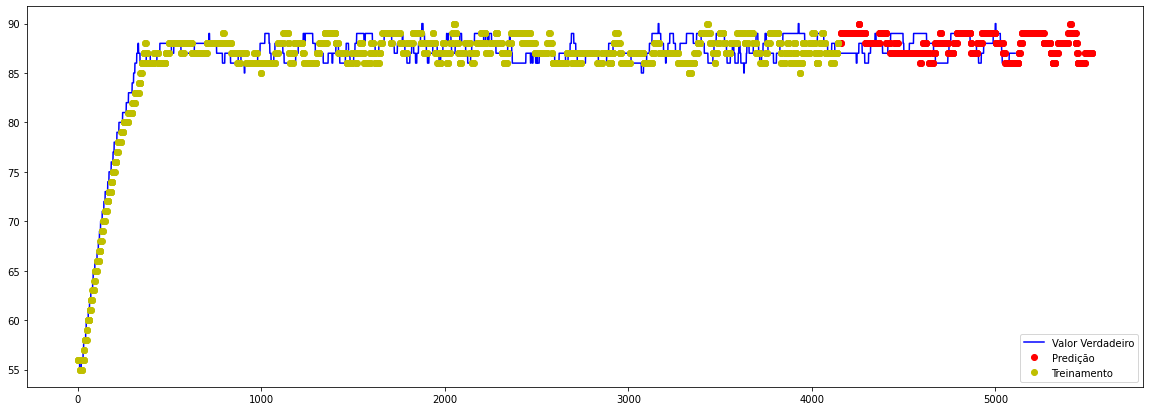

In [ ]:
import matplotlib.pyplot as plt
import datetime

plt.figure(figsize=(20, 7))
plt.plot(range(len(y)), y, 'b-', label = 'Valor Verdadeiro')
plt.plot(y_test.index, y_test, 'ro', label = 'Predição')
plt.plot(y_train.index, y_train, 'yo', label = 'Treinamento')
plt.legend()